# **Convolution Neural Network Implementation in Pytorch**

Welcome to Lab #2. In this you will implement *AlexNet, ResNet18, MobileNetV1 and MobileNetV2* and train them from scratch and train on the Cifar10 dataset.
You will learn to:
- Implement the well-known architectures and other details such as,
  - Data loader
  - Data augmentation
  - Model Implementation
  - Training procedure
  - Testing the performance
  - Store the weights

#Task overview
Implementing a classification model for CIFAR-10 classification is a common computer vision task that involves training a deep neural network to classify images from the CIFAR-10 dataset. We will work with specific architectures in the family of convolutional neural networks known for their excellent performance in image classification tasks.

Key Steps and Components:

  **1- Dataset Preparation:**
  Obtain the CIFAR-10 dataset, which contains 60,000 32x32 color images across 10 classes (e.g., airplanes, cars, cats, dogs, etc.).

  **2- Model Architecture:**
  - Implement the different architectures, which include AlexNet, ResNet18, MobileNetV1 and MobileNetV2.

**3- Data Preprocessing:** Normalize the image pixel values (e.g., mean subtraction and standardization) to ensure the model trains effectively.

**4- Training:**
 - Use a deep learning framework (e.g., PyTorch) to train the model on the training dataset.
 - Employ techniques like data augmentation (random rotations, flips, crops) to improve generalization.
 - Choose appropriate hyperparameters, such as learning rate, batch size, and optimizer (e.g., Adam, SGD).

# Important

1- Please complete all the tasks in this notebook. There are 15 tasks in total in this notebook

2- The tasks 11 and 13 in which you have to answer questions, please make sure to include answers for those questions in this notebook as well as in your lab report.

3- Please note that the final task 15 at the end of this notebook which asks you to train all the models on Cifar10 dataset and write the results in your report is the most important.





## 1-Packages ##
First, you may run the cell below to import all the necessary packages and assign an appropriate alias to each.
- [torch](https://pytorch.org/) is a high-performance yet simple to use framework for deep learning inplementation
- [torch.nn](https://pytorch.org/docs/stable/nn.html) is the basic block for graphs
- [torchvision](https://pytorch.org/vision/stable/index.html) is a package consists of popular datasets, model architectures, and common image transformations for computer vision.
- [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html#transforms-scriptability) is a set of common image transformations available in torchvision.

In [13]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

Set PyTorch to use GPU if it is available

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Set training hyperparameters

In [45]:
#Task 1
num_epochs = 20 #Set anb appropriate number of training epochs
learning_rate = 0.001 #Learning rate for the obtimization

batch_size=  1024  # You may need to set the batch size appropriate for your device GPU

In [16]:
#Task 2
## You may need to design an appropriate data transform using torchvision.transform.
## The data transform must contain padding with size 4, RandomHorizontalFlip, RandomCrop, and ToTensor
## You may need to study torchvision reference attached above
### START CODE HERE ###
transform = transforms.Compose([
    transforms.Pad(4), #Apply padding here
    transforms.RandomHorizontalFlip(), #Apply Random Horizontal Flip
    transforms.RandomCrop(32), #RandomCrop
    transforms.ToTensor()  #ToTensor
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
### END CODE HERE ###

Load CIFAR10 dataset from torchvision and store in two subsets of train_dataset and test_dataset

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False,
                                            transform=transforms.ToTensor())

Files already downloaded and verified


Create data loaders for training and testing

In [6]:
#Task3
##Creat train_loader and test_loader using torch.utils.data.DataLoader
## batchsize for both loaders is the same
##data should be shuffled for train_loader
##data must not be shuffled for test_loader
### START CODE HERE ### (≈ 2 lines of code)
train_loader = torch.utils.data. DataLoader(train_dataset, batch_size = batch_size, pin_memory = True, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, pin_memory = True , shuffle=False)
### END CODE HERE ###

#AlexNet

AlexNet is a groundbreaking deep convolutional neural network architecture introduced by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012, which won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) with a significant margin. The architecture consists of 5 convolutional layers followed by 3 fully connected layers. It employs several key innovations, including ReLU (Rectified Linear Unit) activation functions, which accelerate training by reducing the problem of vanishing gradients, and dropout, which helps prevent overfitting by randomly dropping units during training. AlexNet also introduced data augmentation and local response normalization to further improve performance. The network’s success demonstrated the power of deep learning for image classification and paved the way for more advanced architectures.

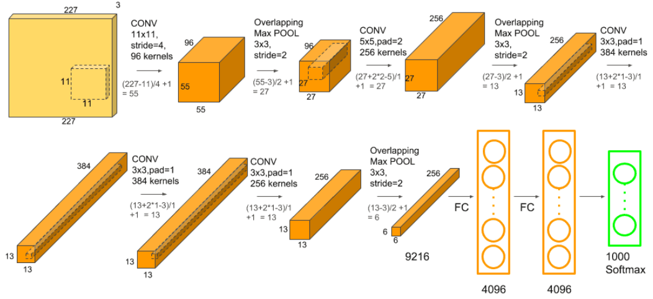

**Understanding nn.Sequential in PyTorch**

The **nn.Sequential** module in PyTorch is a convenient way to build a neural network by stacking layers in a linear sequence. This means that each layer is applied to the input data one after the other, in the order they are defined. It simplifies the process of creating a network by allowing you to compose complex models in a straightforward manner.

In [7]:
# The original model is designed such that it will take only image of size 227x227
# So we change the kernel sizes and strides of the convolution layers in the model
# to work with our image size of 32x32 for Cifar dataset.
class AlexNet(nn.Module):
    def __init__(self, num_classes=15):
        # Initialize the AlexNet model, with the number of output classes set to 15 (can be modified).
        super(AlexNet, self).__init__()

        # First convolutional layer: Input channels = 3 (RGB image), output channels = 96.
        # Convolution kernel size = 3x3, stride = 1, padding = 1 to preserve spatial dimensions.
        # BatchNorm2d normalizes the activations to speed up convergence.
        # ReLU is the activation function for non-linearity.
        # MaxPool2d reduces the spatial dimensions by 2x2 with a stride of 2.
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) 
        # (pi - k + 2p)/S + 1
        # conv2d = (pi=32 - k=3+2p)/S=1 + b=1 = 32
        # MaxPool = (pi=32 - k=2+2p(0)/s=2 + 1 = 16

        # Second convolutional layer: Input channels = 96, output channels = 256.
        # Again, using 3x3 convolution, followed by BatchNorm2d, ReLU, and MaxPooling.
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # conv2d = (pi=16 - k=3+2p(1))/S=1 + b=1 = 16
        # MaxPool = (pi=16 - k=2+2p(0)/s=2 + 1 = 8

        # Third convolutional layer: Input channels = 256, output channels = 384.
        # Uses a 3x3 convolution, followed by BatchNorm2d and ReLU without pooling (to retain more spatial information).
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )
        # conv2d = (pi=8 - k=3+2p(1))/S=1 + b=1 = 8

        # Fourth convolutional layer: Input channels = 384, output channels = 384.
        # Similar to layer 3, no pooling is applied.
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )
        # conv2d = (pi=8 - k=3+2p(1))/S=1 + b=1 = 8

        #TASK 4: Based on the previous code please complete the code below
        # Fifth convolutional layer: Input channels = 384, output channels = 256.
        # Applies 3x3 convolution, followed by BatchNorm2d, ReLU, and MaxPooling for spatial reduction.

        ### CODE START HERE ###

        self.layer5 = nn.Sequential( 
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),#Apply Conv2d with 384 Input channel and 256 output channels, kernel size 3, stride=padding=1
            nn.BatchNorm2d(256),                                    #Batch Normalization
            nn.ReLU(),                                              #Apply Relu
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # conv2d = (pi=8 - k=3+2p(1))/S=1 + b=1 = 8
        # MaxPool = (pi=8 - k=2+2p(0)/s=2 + 1 = 4
        # 8 * 8* 256 do pooling pi(x)=4 * pi(y)=4* channels=256 = 4096

        ### CODE END HERE ###

        #TASK 5:
        # There is a layer missing that has to be initialized here.
        # Please look at all the layers and see which layer is missing and then
        # initialize the layer below
        ### START CODE HERE ###

        self.layer6 = nn.Flatten()                                      #(one line of code) Hint: The layer comes between convolutional and fully connected layers
                                                                        #Flatten the output of the last convolutional layer to feed to the fully connected layer
        ### END CODE HERE ###

        # Fully connected layers (fc), each followed by Dropout and ReLU for regularization and non-linearity.
        # Dropout is applied to prevent overfitting by randomly zeroing some connections.
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),  # Maps the input features to 4096 neurons.
            nn.ReLU()
        )

        # Second fully connected layer, also with Dropout and ReLU.
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),  # Another 4096 neurons for representation.
            nn.ReLU()
        )

        # Final fully connected layer (fc2) maps the 4096 neurons to the number of output classes (e.g., 15 classes).
        self.fc2 = nn.Sequential(
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        #TASK 6
        # Pass the input through each convolutional and pooling layer sequentially.

        ### START CODE HERE ###
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)  
        out = self.layer5(out)

        # Use the missing layer that you initialized in the constructor
        out = self.layer6(out)

        ### END CODE HERE ###

        # Pass through the fully connected layers.
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)

        # Output the final classification logits.
        return out


In [8]:
from torchsummary import summary
image_size = 32
dummy_alexnet = AlexNet().to(device)
summary(dummy_alexnet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 32, 32]           2,688
       BatchNorm2d-2           [-1, 96, 32, 32]             192
              ReLU-3           [-1, 96, 32, 32]               0
         MaxPool2d-4           [-1, 96, 16, 16]               0
            Conv2d-5          [-1, 256, 16, 16]         221,440
       BatchNorm2d-6          [-1, 256, 16, 16]             512
              ReLU-7          [-1, 256, 16, 16]               0
         MaxPool2d-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 384, 8, 8]         885,120
      BatchNorm2d-10            [-1, 384, 8, 8]             768
             ReLU-11            [-1, 384, 8, 8]               0
           Conv2d-12            [-1, 384, 8, 8]       1,327,488
      BatchNorm2d-13            [-1, 384, 8, 8]             768
             ReLU-14            [-1, 38

**Expected**

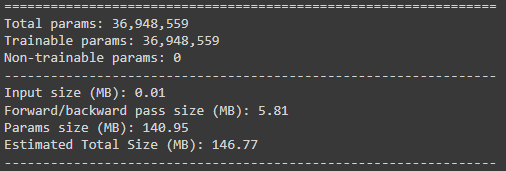

In [51]:

model = AlexNet().to(device)

criterion = nn.CrossEntropyLoss() # The loss function used for training the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [52]:
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
        

In [53]:
from tqdm import tqdm

In [54]:
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # You can see that we load the images and labels from the train_loader and transfer them to the proper device (GPU if available)
        # Now you need to pass the images through the model, calculate the loss and perform gradient descent on it
        # Please complete the code below
        #TASK 7

        ### START CODE HERE ###

        # Forward pass
        outputs = model(images)      # Apply the model
        loss =   criterion(outputs, labels)         # Calculate the loss between the outputs and the labels by applying the "criterion" initialized

        # Backward and optimize
        optimizer.zero_grad() # out the gradients
        loss.backward()                       # Use the optimizer to calculate the gradients with the backward() function
        optimizer.step()                      # use the optimizer to update the parameters using the step() function

        ### END CODE HERE ###

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Step [100/391] Loss: 2.0641
Epoch [1/20], Step [200/391] Loss: 1.7856
Epoch [1/20], Step [300/391] Loss: 1.6470


  5%|▌         | 1/20 [00:14<04:37, 14.62s/it]

Epoch [2/20], Step [100/391] Loss: 1.6215
Epoch [2/20], Step [200/391] Loss: 1.6500
Epoch [2/20], Step [300/391] Loss: 1.2253


 10%|█         | 2/20 [00:28<04:19, 14.40s/it]

Epoch [3/20], Step [100/391] Loss: 1.5000
Epoch [3/20], Step [200/391] Loss: 1.2675
Epoch [3/20], Step [300/391] Loss: 1.2731


 15%|█▌        | 3/20 [00:43<04:03, 14.32s/it]

Epoch [4/20], Step [100/391] Loss: 1.3036
Epoch [4/20], Step [200/391] Loss: 1.0432
Epoch [4/20], Step [300/391] Loss: 1.0561


 20%|██        | 4/20 [00:57<03:50, 14.38s/it]

Epoch [5/20], Step [100/391] Loss: 0.9912
Epoch [5/20], Step [200/391] Loss: 1.2471
Epoch [5/20], Step [300/391] Loss: 0.7263


 25%|██▌       | 5/20 [01:11<03:34, 14.27s/it]

Epoch [6/20], Step [100/391] Loss: 1.1202
Epoch [6/20], Step [200/391] Loss: 0.8326
Epoch [6/20], Step [300/391] Loss: 1.0473


 30%|███       | 6/20 [01:25<03:19, 14.24s/it]

Epoch [7/20], Step [100/391] Loss: 0.7271
Epoch [7/20], Step [200/391] Loss: 0.9366
Epoch [7/20], Step [300/391] Loss: 0.8147


 35%|███▌      | 7/20 [01:40<03:06, 14.36s/it]

Epoch [8/20], Step [100/391] Loss: 0.7400
Epoch [8/20], Step [200/391] Loss: 0.6111
Epoch [8/20], Step [300/391] Loss: 0.9243


 40%|████      | 8/20 [01:54<02:53, 14.43s/it]

Epoch [9/20], Step [100/391] Loss: 0.7637
Epoch [9/20], Step [200/391] Loss: 0.7804
Epoch [9/20], Step [300/391] Loss: 0.5754


 45%|████▌     | 9/20 [02:09<02:38, 14.44s/it]

Epoch [10/20], Step [100/391] Loss: 0.7915
Epoch [10/20], Step [200/391] Loss: 0.8339
Epoch [10/20], Step [300/391] Loss: 0.6225


 50%|█████     | 10/20 [02:22<02:21, 14.13s/it]

Epoch [11/20], Step [100/391] Loss: 0.6233
Epoch [11/20], Step [200/391] Loss: 0.6665
Epoch [11/20], Step [300/391] Loss: 0.5655


 55%|█████▌    | 11/20 [02:36<02:05, 14.00s/it]

Epoch [12/20], Step [100/391] Loss: 0.5582
Epoch [12/20], Step [200/391] Loss: 0.3272
Epoch [12/20], Step [300/391] Loss: 0.5786


 60%|██████    | 12/20 [02:50<01:51, 13.98s/it]

Epoch [13/20], Step [100/391] Loss: 0.4485
Epoch [13/20], Step [200/391] Loss: 0.6201
Epoch [13/20], Step [300/391] Loss: 0.6233


 65%|██████▌   | 13/20 [03:06<01:41, 14.43s/it]

Epoch [14/20], Step [100/391] Loss: 0.6195
Epoch [14/20], Step [200/391] Loss: 0.6054
Epoch [14/20], Step [300/391] Loss: 0.4104


 70%|███████   | 14/20 [03:23<01:32, 15.37s/it]

Epoch [15/20], Step [100/391] Loss: 0.3976
Epoch [15/20], Step [200/391] Loss: 0.5736
Epoch [15/20], Step [300/391] Loss: 0.5069


 75%|███████▌  | 15/20 [03:39<01:16, 15.40s/it]

Epoch [16/20], Step [100/391] Loss: 0.3644
Epoch [16/20], Step [200/391] Loss: 0.4556
Epoch [16/20], Step [300/391] Loss: 0.4053


 80%|████████  | 16/20 [03:53<01:00, 15.11s/it]

Epoch [17/20], Step [100/391] Loss: 0.2293
Epoch [17/20], Step [200/391] Loss: 0.2995
Epoch [17/20], Step [300/391] Loss: 0.3420


 85%|████████▌ | 17/20 [04:07<00:44, 14.72s/it]

Epoch [18/20], Step [100/391] Loss: 0.4606
Epoch [18/20], Step [200/391] Loss: 0.3017
Epoch [18/20], Step [300/391] Loss: 0.2506


 90%|█████████ | 18/20 [04:21<00:29, 14.55s/it]

Epoch [19/20], Step [100/391] Loss: 0.3782
Epoch [19/20], Step [200/391] Loss: 0.2745
Epoch [19/20], Step [300/391] Loss: 0.3356


 95%|█████████▌| 19/20 [04:35<00:14, 14.28s/it]

Epoch [20/20], Step [100/391] Loss: 0.3650
Epoch [20/20], Step [200/391] Loss: 0.3315
Epoch [20/20], Step [300/391] Loss: 0.3588


100%|██████████| 20/20 [04:49<00:00, 14.45s/it]


In [17]:
model.eval()

AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [55]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Accuracy of the model on the test images: 84.63 %


## ResNet-18

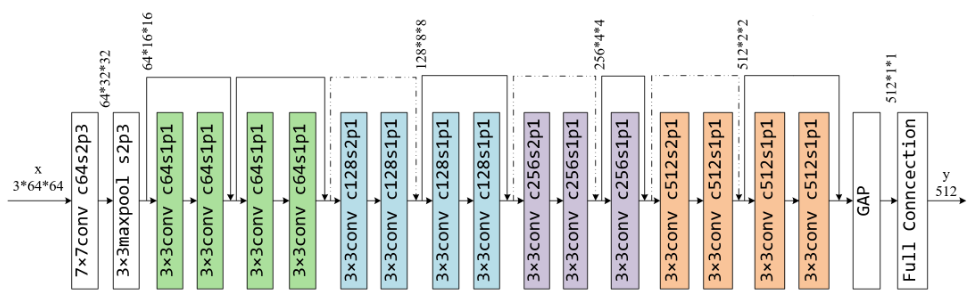

ResNet-18 is a deep convolutional neural network architecture that leverages residual learning to address the problem of vanishing gradients in very deep networks. Introduced as part of the ResNet (Residual Network) family, ResNet-18 features 18 layers, including convolutional, pooling, and fully connected layers. The key innovation in ResNet-18 is the use of residual blocks, which include shortcut connections that skip one or more layers. These shortcut connections add the input of the block to its output, allowing gradients to flow more easily through the network during training. This design mitigates the degradation problem that typically occurs as networks become deeper, enabling effective training of much deeper networks. ResNet-18 is characterized by its simplicity and efficiency, making it suitable for a wide range of image classification tasks.

In [19]:
import torch
import torch.nn as nn

# Define the basic Residual Block used in ResNet
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        """
        ResBlock constructor to initialize layers for a basic residual block.

        Parameters:
        - in_channels: number of input channels (depth of input feature map).
        - out_channels: number of output channels (depth of output feature map).
        - downsample: a boolean flag. If True, downsample the input to match the size.
        """
        super().__init__()

        # If downsample is True, the stride is 2 for downsampling the feature maps.
        if downsample:
            # First convolution: downsampling with stride=2
            #print("OI")
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
            # Shortcut connection to match dimensions, using a 1x1 convolution to adjust channels as well as the spatial size
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
            # Shortcut is an identity connection if channel or spatial dimensions don't change
            #print("VEY")
            if in_channels == out_channels:
                self.shortcut = nn.Identity()
            else:
                # If the channel dimensions are changing, use a 1x1 convolution to match channel dimensions
                self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1),
                nn.BatchNorm2d(out_channels)
            )

        # Second convolution: no downsampling here, just a standard convolution
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)

        # Batch normalization for both convolutions
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # ReLU activation
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the ResBlock.

        Parameters:
        - x: the input feature map

        Returns:
        - The output after applying the convolutions, batch normalization, and residual addition.
        """
        #Task 8: Understand why and how various layers are initialized in the constructor of this class and then apply them
        #        in the proper sequence below.

        ### CODE START HERE ###

        # Store the shortcut connection, which could either be the identity or a downsampled version
        # Hint: Apply the shortcut layer on the input
        shortcut = self.shortcut(x)

        # First convolution -> batch norm -> ReLU
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        # Second convolution -> batch norm -> ReLU
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        # Add the shortcut (identity or downsampled) to the output of the convolutions
        #print(shortcut, ", ", x)
        x = shortcut + x
        

        # Apply final ReLU activation and return x
        x = self.relu(x)
        ### CODE END HERE ###
        return x

In [20]:
resblock_class = ResBlock( 3, 4, True)

In [21]:
resblock_class

ResBlock(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (shortcut): Sequential(
    (0): Conv2d(3, 4, kernel_size=(1, 1), stride=(2, 2))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)

In [37]:
# Define ResNet18 using ResBlock
class ResNet18(nn.Module):
    def __init__(self, in_channels, resblock, n_outputs=10):
        """
        Constructor for ResNet18.

        Parameters:
        - in_channels: number of input channels (e.g., 3 for RGB images).
        - resblock: the residual block class.
        - outputs: the number of classes for the final output (default: 15).
        """
        super().__init__()


        # Initial layers of the ResNet with a 7x7 convolution followed by max-pooling
        self.layer0 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1), # First convolution with large kernel
            #nn.MaxPool2d(kernel_size=3, stride=2, padding=1),              # Max pooling to downsample
            nn.BatchNorm2d(64),                                             # Batch normalization
            nn.ReLU()                                                       # ReLU activation
             
                                                                 
        )

        # First set of residual blocks, no downsampling in spatial size (stride=1)
        self.layer1 = nn.Sequential(
            resblock(64, 64, downsample=False),  # First ResBlock
            resblock(64, 64, downsample=False)   # Second ResBlock
        )

        # Second set of residual blocks, downsample with stride 2 (half the spatial dimensions) and
        # increase the number of channels by 2 from 64 to 128
        self.layer2 = nn.Sequential(
            resblock(64, 128, downsample=True),  # First ResBlock with downsampling (stride=2)
            resblock(128, 128, downsample=False) # Second ResBlock without downsampling
        )

        #Task 9: Taking the self.layer2 as an example complete the code for self.layer3
        #and self.layer4 below based on the given information like number of channels

        ### START CODE HERE ###

        # Third set of residual blocks, downsample to 256 channels
        self.layer3 = nn.Sequential(
            resblock(128, 256, downsample=True), # First ResBlock with downsampling, increase channels from 128 to 256
            resblock(256, 256, downsample=False)  # Second ResBlock without downsampling, channel size 256
        )

        # Fourth and final set of residual blocks, downsample to 512 channels
        self.layer4 = nn.Sequential(
            resblock(256, 512, downsample=True), # First ResBlock with downsampling, increase channels from 256 to 512
            resblock(512, 512, downsample=False)  # Second ResBlock without downsampling, channel size 512
        )
        ### END CODE ###

        # Global Average Pooling to reduce the feature map to size (1,1)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))

        # Flatten the feature map to a 1D vector
        self.flatten = nn.Flatten()

        # Fully connected layer for classification, outputs a vector of length `outputs`
        self.fc = nn.Linear(512, n_outputs)

    def forward(self, input):
        """
        Forward pass for ResNet18.

        Parameters:
        - input: input image tensor

        Returns:
        - Output of the model (logits for classification).
        """

        #Task 10: Understand why and how various layers are initialized in the constructor of this class and then apply them
        #        in the proper sequence below.

        ### START CODE HERE ###
        # Pass through the initial convolutional layer and pooling layer0 in this case
        input = self.layer0(input)

        # Pass through each set of residual blocks, the layers after layer0
        input = self.layer1(input)
        input = self.layer2(input)
        input = self.layer3(input)
        input = self.layer4(input)

        # Global Average Pooling to convert (batch_size, 512, H, W) to (batch_size, 512, 1, 1)
        input = self.gap(input)
        #print(f'shape0:, {input.shape}')

        # Flatten the output to (batch_size, 512)
        input = self.flatten(input)
        #print(f'shape1:, {input.shape}')

        # Final fully connected layer for classification
        input = self.fc(input)
        #print(f'shape:, {input.shape}')
        ### END CODE ###
        return input

**Task 11**

Please answer the following questions:

Q.i: In the above cell what does the "**self.gap**" layer represent? With which function is it initialized by and why?

Q.ii: In the above cell what does the "**self.flatten**" layer represent? With which function is it initialized by and why?

Q.iii: Why are we using the **self.fc** layer at the end of the network? What is its purpose?

Q.iv: **Important** You might have learnt at the in the lectures that in classification tasks involving multiple classes we generally use the softmax function but in this case we are not using it. Could you explain why?

**Q1**: self.gap gives itself a well deserved gap in the data, to not overwork itself. Yeah, no. Self.gap is the pooling function (nn.adaptiveavgpool2d). It is initialized by the forward function.

**Q2**: It flattens each image in the batch to be a single vector. It is initialized by forward function, and it is to make the FC (Fully connected) NN (neural network) viable and possible to run.

**Q3**: We are using the FC to summon parameters from hell. We use this to discover patterns in the data, and teach the model from the conv. network. It is used to map the features collected / gathered from the conv. network and map them with class scores and perform classification for images.

**Q4**: We aren't training the model, and as such we have not determined which loss function we are using. But if we were, as part of the previous model - the AlexNet model, we were using the softmax function as part of the CrossEntropyLoss function.

In [25]:
from torchsummary import summary
image_size = 32
dummy_model = ResNet18(3, ResBlock, 10).to(device)
summary(dummy_model, (3, image_size, image_size))
########### HEJ!!

shape0:, torch.Size([2, 512, 1, 1])
shape1:, torch.Size([2, 512])
shape:, torch.Size([2, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
          Identity-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,928
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,928
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
             ReLU-11           [-1, 64, 32, 32]               0
         ResBlock-12           [-1, 64, 32, 32]               0
         

Expected Output:

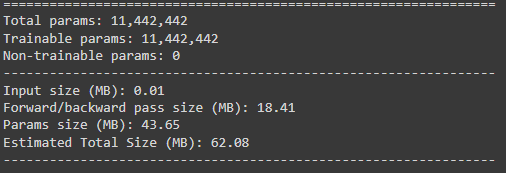

# Mobile NetV1

MobileNetV1 introduces depthwise separable convolutions as a key architectural innovation to improve computational efficiency and reduce model size. This technique decomposes a standard convolution into two distinct layers: a depthwise convolution and a pointwise convolution. The depthwise convolution applies a single convolutional filter per input channel, capturing spatial features with lower computational cost. Subsequently, the pointwise convolution, which is a 1x1 convolution, combines these features across channels, enabling the network to learn complex combinations of the extracted features. By separating the convolutional process into these two steps, MobileNetV1 significantly reduces the number of parameters and computational load, making it well-suited for mobile and embedded devices where resources are limited.

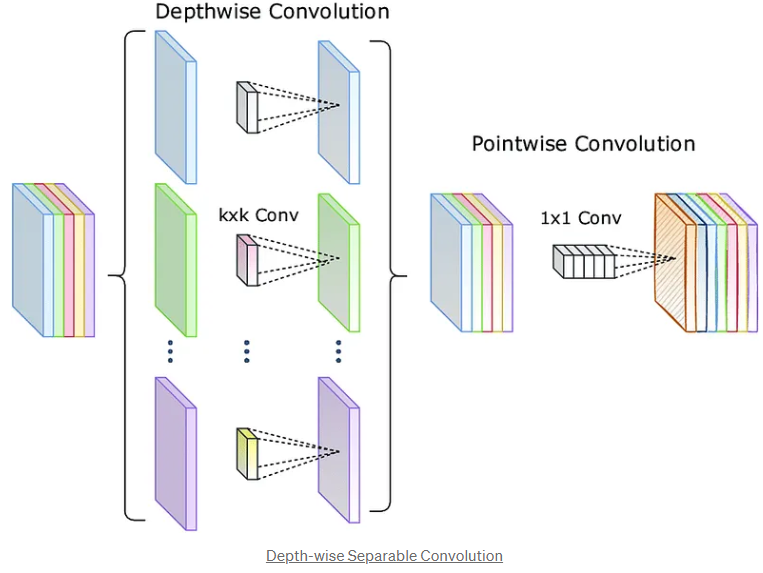

Given below is the complete architecture of MobileNetV1. The number classes at the end of the network is 1000 for ImageNet while in our case its going to be 10 for Cifar10.

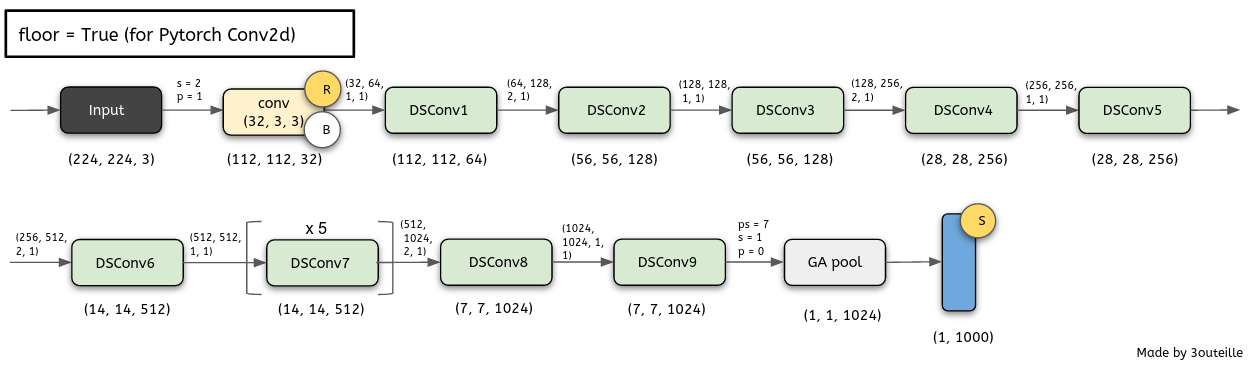

In [26]:
class MobileNetV1(nn.Module):
    def __init__(self, ch_in, n_classes):
        super(MobileNetV1, self).__init__()

        def conv_bn(inp, oup, stride):  ## Fråga lärare, vad står bn för?
            return nn.Sequential(
                # Input, Output, Kernel, Stride, Padding, Bias
                nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True)
                )

        def conv_dw(inp, oup, stride): # Deapthwise
            return nn.Sequential(
                # dw = deapthwise
                nn.Conv2d(inp, inp, 3, stride, 1, groups=inp, bias=False),
                nn.BatchNorm2d(inp),
                nn.ReLU(inplace=True),

                # pw = pointwise
                nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True),
                )

        self.model = nn.Sequential(
            conv_bn(ch_in, 32, 2),
            conv_dw(32, 64, 1),
            conv_dw(64, 128, 2),
            conv_dw(128, 128, 1),
            conv_dw(128, 256, 2),
            conv_dw(256, 256, 1),
            conv_dw(256, 512, 2),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 1024, 2),
            conv_dw(1024, 1024, 1),
            nn.AdaptiveAvgPool2d(1)
        )
        self.fc = nn.Linear(1024, n_classes)

    def forward(self, x):
        # TASK 12: Understand the initialized layers in the constructor of this class and complete the code given below.

        ### START CODE HERE ###
        x = self.model(x)
        x = x.view(-1, 1024)
        x = self.fc(x)
        ### END CODE HERE ###
        return x



**TASK 13:** Please answer the following questions:

**Question i**: What does the "x.view(-1, 1024)" do in the above cell? Why are we using it?

**Question ii**: In the depth-wise separable convolution block (conv_dw function in the above cell) we perform first the depth-wise convolution and then the pointwise, but for the both the operations we are using the Conv2d layer of pytorch, how is Conv2d used for both the operations. What is the difference between the two usages?

**Question iii**: What is the **nn.AdaptiveAvgPool2d(1)** function doing in the above code?

**Question I**: We are using it to 'flatten' each image of the 'batch' into a single vector.

**Question II**:  1. The first conv2d depthwise convolution, taking the kernel size of 3x3 for all channels (group=inp), with the stride of (1 or 2. ) 
               2. The second conv2d is pointwise convolution, is changing the amount of channels (oup) with the kernel size of 1x1, while keeping the pixels of the image the same
               
**Question III**: As opposed to other pooling functions (ex: max pooling, avg pooling), this pool function is adaptive and corrects the kernel and stride automatically to match the desired output pixel size, which is the only parameter (1 in this case). **Source**: *Trustmebro*

In [27]:
from torchsummary import summary
image_size = 32
dummy_mobilenet = MobileNetV1(ch_in=3, n_classes=10).to(device)
summary(dummy_mobilenet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 16, 16]             864
       BatchNorm2d-2           [-1, 32, 16, 16]              64
              ReLU-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]             288
       BatchNorm2d-5           [-1, 32, 16, 16]              64
              ReLU-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 64, 16, 16]           2,048
       BatchNorm2d-8           [-1, 64, 16, 16]             128
              ReLU-9           [-1, 64, 16, 16]               0
           Conv2d-10             [-1, 64, 8, 8]             576
      BatchNorm2d-11             [-1, 64, 8, 8]             128
             ReLU-12             [-1, 64, 8, 8]               0
           Conv2d-13            [-1, 128, 8, 8]           8,192
      BatchNorm2d-14            [-1, 12

**Expected**

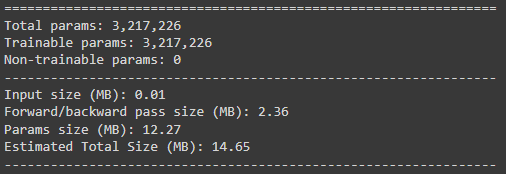

# Mobile NetV2

MobileNetV2 builds upon the ideas of its predecessor, MobileNetV1, by introducing several key enhancements to improve performance and efficiency.

**Depthwise Separable Convolutions:**

**Depthwise Convolution:** Applies a single convolutional filter per input channel, which reduces the computational cost compared to standard convolutions.

**Pointwise Convolution:** A 1x1 convolution applied after the depthwise convolution to combine the outputs from the depthwise layer.

**Inverted Residuals:**
MobileNetV2 introduces an efficient neural network architecture using an innovative concept called inverted residuals, which combines depthwise separable convolutions with linear bottlenecks. The core of MobileNetV2's design is the inverted residual block, which first expands the input channels using a lightweight 1x1 convolution (expansion phase) to increase the feature dimensionality. This is followed by a depthwise separable convolution that applies spatial filters independently to each channel, and then a 1x1 convolution is used again to project the features down to a reduced number of channels (projection phase). The expansion phase effectively increases the capacity of the network while keeping the computational cost manageable, and the depthwise separable convolutions help in reducing the overall computational complexity while preserving the rich feature representations.
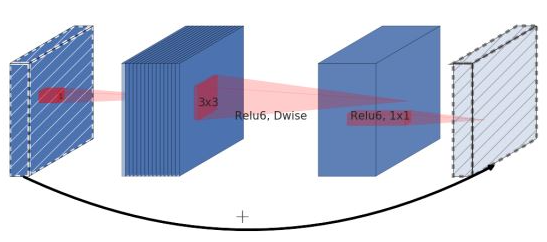

**Overall Architecture**

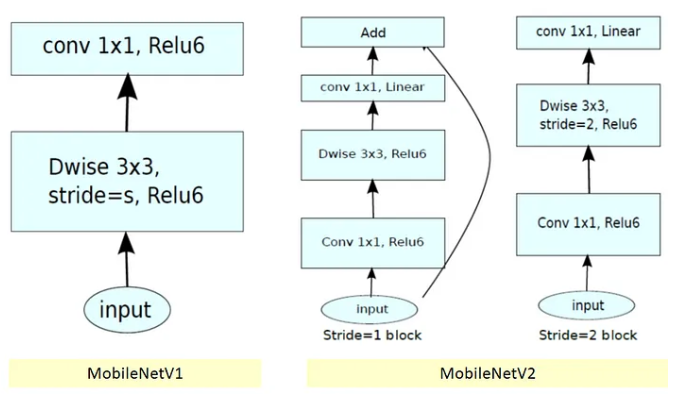

In [28]:
import math
import torch.nn as nn

def conv_3x3_bn(inp, oup, stride):
    """
    Constructs a 3x3 convolution followed by BatchNorm and ReLU6 activation.
    :param inp: Number of input channels.
    :param oup: Number of output channels.
    :param stride: The stride of the convolution.
    :return: A sequential module containing conv, bn, and ReLU6 layers.
    """
    return nn.Sequential(
        nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
        nn.BatchNorm2d(oup),
        nn.ReLU6(inplace=True)
    )

def conv_1x1_bn(inp, oup): # convolution, kernel = 1, bn = batchnorm
    """
    Constructs a 1x1 convolution followed by BatchNorm and ReLU6 activation.
    :param inp: Number of input channels.
    :param oup: Number of output channels.
    :return: A sequential module containing conv, bn, and ReLU6 layers.
    """
    return nn.Sequential(
        nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
        nn.BatchNorm2d(oup),
        nn.ReLU6(inplace=True)
    )

class InvertedResidual(nn.Module):
    def __init__(self, inp, oup, stride, expand_ratio):
        """
        InvertedResidual block as used in MobileNetV2.
        :param inp: Number of input channels.
        :param oup: Number of output channels.
        :param stride: The stride of the depthwise convolution.
        :param expand_ratio: The ratio to expand the input channels.
        """
        super(InvertedResidual, self).__init__()
        assert stride in [1, 2]

        hidden_dim = round(inp * expand_ratio)
        self.identity = stride == 1 and inp == oup

        if expand_ratio == 1:
            # When expand ratio is 1, perform depthwise convolution only.
            self.conv = nn.Sequential(
                # Depthwise convolution
                #Input channels, output channels, kernel, stride, padding, groups, bias
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # Pointwise convolution
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )
        else:
            # Expand and then perform depthwise convolution followed by pointwise convolution.
            self.conv = nn.Sequential(
                # Pointwise convolution (expand)
                #Input channels, output channels, kernel, stride, padding, groups, bias
                nn.Conv2d(inp, hidden_dim, 1, 1, 0, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # Depthwise convolution
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # Pointwise convolution (linear)
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )

    def forward(self, x):
        """
        Forward pass for the InvertedResidual block.
        :param x: Input tensor.
        :return: Output tensor.
        """
        if self.identity:
            return x + self.conv(x)  # Skip connection
        else:
            return self.conv(x)

class MobileNetV2(nn.Module):
    def __init__(self, num_classes=1000,):
        """
        MobileNetV2 model initialization.
        :param num_classes: Number of output classes.
        """
        super(MobileNetV2, self).__init__()
        # Configuration of inverted residual blocks (expand_ratio, output_channels, num_blocks, stride)
        self.cfgs = [
            [1,  16, 1, 1],
            [6,  24, 2, 2],
            [6,  32, 3, 2],
            [6,  64, 4, 2],
            [6,  96, 3, 1],
            [6, 160, 3, 2],
            [6, 320, 1, 1],
        ]

        # Building the initial layer
        input_channel = 32
        layers = [conv_3x3_bn(3, input_channel, 2)]

        # Adding inverted residual blocks
        block = InvertedResidual
        for t, c, n, s in self.cfgs:
            output_channel = c
            for i in range(n):
                layers.append(block(input_channel, output_channel, s if i == 0 else 1, t))
                input_channel = output_channel

        # Sequentially add all layers to the model
        self.features = nn.Sequential(*layers)

        # Building the final layers
        output_channel = 1280
        self.conv = conv_1x1_bn(input_channel, output_channel)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Linear(output_channel, num_classes)

        self._initialize_weights()

    def forward(self, x):
        """
        Forward pass for the MobileNetV2 model.
        :param x: Input tensor.
        :return: Output tensor.
        """
        #Task 14: Please understand how diferent layers havae been initialized in the constructor of this class and
        #         then apply all the layers as instructed here.
        ### START CODE HERE ###
        x = self.features(x)      # Pass through feature extractor layers
        x = self.conv(x)      # Pass through final convolution layer
        x = self.avgpool(x)      # Apply adaptive average pooling
        x = x.view(x.size(0), -1)  # Flatten the tensor for the classifier
        x = self.classifier(x)      # Pass through the classifier
        ### END CODE HERE ###
        return x

    def _initialize_weights(self):
        """
        Initialize the weights of the model layers.
        :return: None
        """
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.weight.data.normal_(0, 0.01)
                m.bias.data.zero_()


In [30]:
from torchsummary import summary
image_size = 32
dummy_mobilenet = MobileNetV2(10).to(device)
summary(dummy_mobilenet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 16, 16]             864
       BatchNorm2d-2           [-1, 32, 16, 16]              64
             ReLU6-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]             288
       BatchNorm2d-5           [-1, 32, 16, 16]              64
             ReLU6-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 16, 16, 16]             512
       BatchNorm2d-8           [-1, 16, 16, 16]              32
  InvertedResidual-9           [-1, 16, 16, 16]               0
           Conv2d-10           [-1, 96, 16, 16]           1,536
      BatchNorm2d-11           [-1, 96, 16, 16]             192
            ReLU6-12           [-1, 96, 16, 16]               0
           Conv2d-13             [-1, 96, 8, 8]             864
      BatchNorm2d-14             [-1, 9

**Expected**

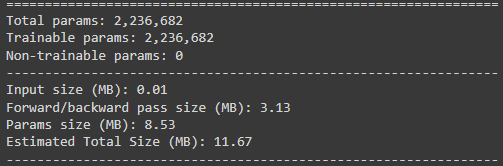

# Important Task 15

In this lab you have implemented and trained the AlexNet model on Cifar10 and also implemented the ResNet18, MobileNetV1 and MobileNetV2 models. Your final task is to also train ResNet18, MobileNetV1 and MobileNetV2 models on the Cifar10 dataset and make a table for showing the following columns for all the models (AlexNet included):

Model Name -  No. of Parameters - Total Size (MB) - Test Accuracy
ALEXNET 
RESTNET
MobilNet V1
MobilNet V2




Please discuss the pros and cons of different models and their performances.

Thank you.

----------------------------------------------------------------

**AlexNet**

Total params: 36,948,559

Trainable params: 36,948,559

Non-trainable params: 0

Input size (MB): 0.01

Forward/backward pass size (MB): 5.81

Params size (MB): 140.95

**Accuracy of the model on the test images**: *84.63%*

Estimated Total Size (MB): 146.77

----------------------------------------------------------------

**MobileNet V2**

Total params: 2,236,682

Trainable params: 2,236,682

Non-trainable params: 0

Input size (MB): 0.01

Forward/backward pass size (MB): 3.13

Params size (MB): 8.53

**Accuracy of the model on the test images**: *74.54%*

Estimated Total Size (MB): 11.67

----------------------------------------------------------------
**MobileNet V1**

Total params: 3,217,226

Trainable params: 3,217,226

Non-trainable params: 0

Input size (MB): 0.01

Forward/backward pass size (MB): 2.36

Params size (MB): 12.27

**Accuracy of the model on the test images**: *76.45%*

Estimated Total Size (MB): 14.65

----------------------------------------------------------------
**ResNet-18 (*HALP!*)**

Total params: 11,178,762

Trainable params: 11,178,762

Non-trainable params: 0

Input size (MB): 0.01

Forward/backward pass size (MB): 18.82

Params size (MB): 42.64

**Accuracy of the model on the test images**: *88.95%*

Estimated Total Size (MB): 61.48

----------------------------------------------------------------

In [46]:
model = ResNet18(3, ResBlock, 10).to(device)

criterion = nn.CrossEntropyLoss() # The loss function used for training the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

from tqdm import tqdm

In [47]:
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # You can see that we load the images and labels from the train_loader and transfer them to the proper device (GPU if available)
        # Now you need to pass the images through the model, calculate the loss and perform gradient descent on it
        # Please complete the code below
        #TASK 7

        ### START CODE HERE ###

        # Forward pass
        outputs = model(images)      # Apply the model
        loss =   criterion(outputs, labels)         # Calculate the loss between the outputs and the labels by applying the "criterion" initialized

        # Backward and optimize
        optimizer.zero_grad() # out the gradients
        loss.backward()                       # Use the optimizer to calculate the gradients with the backward() function
        optimizer.step()                      # use the optimizer to update the parameters using the step() function

        ### END CODE HERE ###

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Step [100/391] Loss: 1.3606
Epoch [1/20], Step [200/391] Loss: 1.2912
Epoch [1/20], Step [300/391] Loss: 1.1847


  5%|▌         | 1/20 [00:19<06:05, 19.24s/it]

Epoch [2/20], Step [100/391] Loss: 1.3425
Epoch [2/20], Step [200/391] Loss: 0.8717
Epoch [2/20], Step [300/391] Loss: 0.8805


 10%|█         | 2/20 [00:38<05:44, 19.13s/it]

Epoch [3/20], Step [100/391] Loss: 0.8782
Epoch [3/20], Step [200/391] Loss: 0.5907
Epoch [3/20], Step [300/391] Loss: 0.5878


 15%|█▌        | 3/20 [00:57<05:23, 19.00s/it]

Epoch [4/20], Step [100/391] Loss: 0.6960
Epoch [4/20], Step [200/391] Loss: 0.5736
Epoch [4/20], Step [300/391] Loss: 0.6563


 20%|██        | 4/20 [01:16<05:04, 19.01s/it]

Epoch [5/20], Step [100/391] Loss: 0.5782
Epoch [5/20], Step [200/391] Loss: 0.7024
Epoch [5/20], Step [300/391] Loss: 0.4380


 25%|██▌       | 5/20 [01:35<04:44, 18.96s/it]

Epoch [6/20], Step [100/391] Loss: 0.5217
Epoch [6/20], Step [200/391] Loss: 0.5309
Epoch [6/20], Step [300/391] Loss: 0.4455


 30%|███       | 6/20 [01:54<04:28, 19.17s/it]

Epoch [7/20], Step [100/391] Loss: 0.3844
Epoch [7/20], Step [200/391] Loss: 0.3890
Epoch [7/20], Step [300/391] Loss: 0.5218


 35%|███▌      | 7/20 [02:15<04:15, 19.68s/it]

Epoch [8/20], Step [100/391] Loss: 0.2382
Epoch [8/20], Step [200/391] Loss: 0.6022
Epoch [8/20], Step [300/391] Loss: 0.4255


 40%|████      | 8/20 [02:34<03:55, 19.63s/it]

Epoch [9/20], Step [100/391] Loss: 0.3314
Epoch [9/20], Step [200/391] Loss: 0.3288
Epoch [9/20], Step [300/391] Loss: 0.3156


 45%|████▌     | 9/20 [02:54<03:34, 19.50s/it]

Epoch [10/20], Step [100/391] Loss: 0.1930
Epoch [10/20], Step [200/391] Loss: 0.2850
Epoch [10/20], Step [300/391] Loss: 0.4817


 50%|█████     | 10/20 [03:12<03:11, 19.12s/it]

Epoch [11/20], Step [100/391] Loss: 0.3871
Epoch [11/20], Step [200/391] Loss: 0.2911
Epoch [11/20], Step [300/391] Loss: 0.2589


 55%|█████▌    | 11/20 [03:30<02:49, 18.86s/it]

Epoch [12/20], Step [100/391] Loss: 0.3249
Epoch [12/20], Step [200/391] Loss: 0.3307
Epoch [12/20], Step [300/391] Loss: 0.2702


 60%|██████    | 12/20 [03:48<02:27, 18.47s/it]

Epoch [13/20], Step [100/391] Loss: 0.2467
Epoch [13/20], Step [200/391] Loss: 0.2999
Epoch [13/20], Step [300/391] Loss: 0.3049


 65%|██████▌   | 13/20 [04:05<02:07, 18.23s/it]

Epoch [14/20], Step [100/391] Loss: 0.1464
Epoch [14/20], Step [200/391] Loss: 0.1903
Epoch [14/20], Step [300/391] Loss: 0.2609


 70%|███████   | 14/20 [04:24<01:49, 18.21s/it]

Epoch [15/20], Step [100/391] Loss: 0.2094
Epoch [15/20], Step [200/391] Loss: 0.2627
Epoch [15/20], Step [300/391] Loss: 0.1829


 75%|███████▌  | 15/20 [04:43<01:32, 18.50s/it]

Epoch [16/20], Step [100/391] Loss: 0.1560
Epoch [16/20], Step [200/391] Loss: 0.2141
Epoch [16/20], Step [300/391] Loss: 0.2372


 80%|████████  | 16/20 [05:02<01:14, 18.70s/it]

Epoch [17/20], Step [100/391] Loss: 0.2470
Epoch [17/20], Step [200/391] Loss: 0.1562
Epoch [17/20], Step [300/391] Loss: 0.2033


 85%|████████▌ | 17/20 [05:21<00:56, 18.75s/it]

Epoch [18/20], Step [100/391] Loss: 0.1348
Epoch [18/20], Step [200/391] Loss: 0.1690
Epoch [18/20], Step [300/391] Loss: 0.3101


 90%|█████████ | 18/20 [05:40<00:37, 18.84s/it]

Epoch [19/20], Step [100/391] Loss: 0.1518
Epoch [19/20], Step [200/391] Loss: 0.1654
Epoch [19/20], Step [300/391] Loss: 0.2530


 95%|█████████▌| 19/20 [05:59<00:18, 18.81s/it]

Epoch [20/20], Step [100/391] Loss: 0.0533
Epoch [20/20], Step [200/391] Loss: 0.1724
Epoch [20/20], Step [300/391] Loss: 0.2212


100%|██████████| 20/20 [06:17<00:00, 18.89s/it]


In [40]:
#model.eval()

ResNet18(
  (layer0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (shortcut): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (shortcut): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=

In [50]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Accuracy of the model on the test images: 88.95 %


**Accuracy of the model on the test images**: *88.95%*

# MobilNet V1

In [42]:
model = MobileNetV1(ch_in=3, n_classes=10).to(device)

criterion = nn.CrossEntropyLoss() # The loss function used for training the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

from tqdm import tqdm


total_step = len(train_loader)
curr_lr = learning_rate
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # You can see that we load the images and labels from the train_loader and transfer them to the proper device (GPU if available)
        # Now you need to pass the images through the model, calculate the loss and perform gradient descent on it
        # Please complete the code below
        #TASK 7

        ### START CODE HERE ###

        # Forward pass
        outputs = model(images)      # Apply the model
        loss =   criterion(outputs, labels)         # Calculate the loss between the outputs and the labels by applying the "criterion" initialized

        # Backward and optimize
        optimizer.zero_grad() # out the gradients
        loss.backward()                       # Use the optimizer to calculate the gradients with the backward() function
        optimizer.step()                      # use the optimizer to update the parameters using the step() function

        ### END CODE HERE ###

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Step [100/391] Loss: 1.9334
Epoch [1/20], Step [200/391] Loss: 1.8067
Epoch [1/20], Step [300/391] Loss: 1.7495


  5%|▌         | 1/20 [00:17<05:25, 17.13s/it]

Epoch [2/20], Step [100/391] Loss: 1.7867
Epoch [2/20], Step [200/391] Loss: 1.6197
Epoch [2/20], Step [300/391] Loss: 1.6377


 10%|█         | 2/20 [00:33<04:59, 16.65s/it]

Epoch [3/20], Step [100/391] Loss: 1.3976
Epoch [3/20], Step [200/391] Loss: 1.3688
Epoch [3/20], Step [300/391] Loss: 1.6008


 15%|█▌        | 3/20 [00:51<04:51, 17.12s/it]

Epoch [4/20], Step [100/391] Loss: 1.4338
Epoch [4/20], Step [200/391] Loss: 1.4735
Epoch [4/20], Step [300/391] Loss: 1.3747


 20%|██        | 4/20 [01:08<04:33, 17.07s/it]

Epoch [5/20], Step [100/391] Loss: 1.3597
Epoch [5/20], Step [200/391] Loss: 1.3103
Epoch [5/20], Step [300/391] Loss: 1.1754


 25%|██▌       | 5/20 [01:24<04:12, 16.86s/it]

Epoch [6/20], Step [100/391] Loss: 1.1721
Epoch [6/20], Step [200/391] Loss: 1.2021
Epoch [6/20], Step [300/391] Loss: 1.2527


 30%|███       | 6/20 [01:40<03:53, 16.67s/it]

Epoch [7/20], Step [100/391] Loss: 1.2534
Epoch [7/20], Step [200/391] Loss: 1.3083
Epoch [7/20], Step [300/391] Loss: 1.1208


 35%|███▌      | 7/20 [01:57<03:35, 16.57s/it]

Epoch [8/20], Step [100/391] Loss: 1.1138
Epoch [8/20], Step [200/391] Loss: 1.1306
Epoch [8/20], Step [300/391] Loss: 0.9814


 40%|████      | 8/20 [02:13<03:16, 16.42s/it]

Epoch [9/20], Step [100/391] Loss: 1.0865
Epoch [9/20], Step [200/391] Loss: 1.1181
Epoch [9/20], Step [300/391] Loss: 1.2578


 45%|████▌     | 9/20 [02:29<03:01, 16.47s/it]

Epoch [10/20], Step [100/391] Loss: 0.9545
Epoch [10/20], Step [200/391] Loss: 0.7733
Epoch [10/20], Step [300/391] Loss: 0.9990


 50%|█████     | 10/20 [02:45<02:43, 16.32s/it]

Epoch [11/20], Step [100/391] Loss: 1.1209
Epoch [11/20], Step [200/391] Loss: 0.9649
Epoch [11/20], Step [300/391] Loss: 0.9109


 55%|█████▌    | 11/20 [03:02<02:27, 16.42s/it]

Epoch [12/20], Step [100/391] Loss: 0.9818
Epoch [12/20], Step [200/391] Loss: 1.1784
Epoch [12/20], Step [300/391] Loss: 0.7509


 60%|██████    | 12/20 [03:18<02:10, 16.29s/it]

Epoch [13/20], Step [100/391] Loss: 0.7532
Epoch [13/20], Step [200/391] Loss: 1.0179
Epoch [13/20], Step [300/391] Loss: 0.7994


 65%|██████▌   | 13/20 [03:35<01:54, 16.35s/it]

Epoch [14/20], Step [100/391] Loss: 0.8453
Epoch [14/20], Step [200/391] Loss: 0.9597
Epoch [14/20], Step [300/391] Loss: 0.8029


 70%|███████   | 14/20 [03:51<01:37, 16.25s/it]

Epoch [15/20], Step [100/391] Loss: 0.9022
Epoch [15/20], Step [200/391] Loss: 0.7745
Epoch [15/20], Step [300/391] Loss: 0.8166


 75%|███████▌  | 15/20 [04:07<01:21, 16.31s/it]

Epoch [16/20], Step [100/391] Loss: 0.8871
Epoch [16/20], Step [200/391] Loss: 0.7766
Epoch [16/20], Step [300/391] Loss: 0.8142


 80%|████████  | 16/20 [04:23<01:04, 16.22s/it]

Epoch [17/20], Step [100/391] Loss: 0.7893
Epoch [17/20], Step [200/391] Loss: 0.5895
Epoch [17/20], Step [300/391] Loss: 0.7231


 85%|████████▌ | 17/20 [04:40<00:49, 16.37s/it]

Epoch [18/20], Step [100/391] Loss: 0.8356
Epoch [18/20], Step [200/391] Loss: 0.6093
Epoch [18/20], Step [300/391] Loss: 0.8706


 90%|█████████ | 18/20 [04:56<00:32, 16.30s/it]

Epoch [19/20], Step [100/391] Loss: 0.8818
Epoch [19/20], Step [200/391] Loss: 0.6613
Epoch [19/20], Step [300/391] Loss: 0.6644


 95%|█████████▌| 19/20 [05:12<00:16, 16.25s/it]

Epoch [20/20], Step [100/391] Loss: 0.7107
Epoch [20/20], Step [200/391] Loss: 0.8277
Epoch [20/20], Step [300/391] Loss: 0.6715


100%|██████████| 20/20 [05:28<00:00, 16.43s/it]


Accuracy of the model on the test images: 76.45 %


# MobilNet V2

In [43]:
model = MobileNetV2(10).to(device)

criterion = nn.CrossEntropyLoss() # The loss function used for training the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

from tqdm import tqdm


total_step = len(train_loader)
curr_lr = learning_rate
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # You can see that we load the images and labels from the train_loader and transfer them to the proper device (GPU if available)
        # Now you need to pass the images through the model, calculate the loss and perform gradient descent on it
        # Please complete the code below
        #TASK 7

        ### START CODE HERE ###

        # Forward pass
        outputs = model(images)      # Apply the model
        loss =   criterion(outputs, labels)         # Calculate the loss between the outputs and the labels by applying the "criterion" initialized

        # Backward and optimize
        optimizer.zero_grad() # out the gradients
        loss.backward()                       # Use the optimizer to calculate the gradients with the backward() function
        optimizer.step()                      # use the optimizer to update the parameters using the step() function

        ### END CODE HERE ###

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Step [100/391] Loss: 2.0483
Epoch [1/20], Step [200/391] Loss: 1.9222
Epoch [1/20], Step [300/391] Loss: 1.7951


  5%|▌         | 1/20 [00:20<06:27, 20.39s/it]

Epoch [2/20], Step [100/391] Loss: 1.6686
Epoch [2/20], Step [200/391] Loss: 1.6639
Epoch [2/20], Step [300/391] Loss: 1.6480


 10%|█         | 2/20 [00:40<06:02, 20.13s/it]

Epoch [3/20], Step [100/391] Loss: 1.5605
Epoch [3/20], Step [200/391] Loss: 1.2886
Epoch [3/20], Step [300/391] Loss: 1.6264


 15%|█▌        | 3/20 [01:00<05:38, 19.93s/it]

Epoch [4/20], Step [100/391] Loss: 1.3691
Epoch [4/20], Step [200/391] Loss: 1.5580
Epoch [4/20], Step [300/391] Loss: 1.3045


 20%|██        | 4/20 [01:20<05:20, 20.05s/it]

Epoch [5/20], Step [100/391] Loss: 1.2730
Epoch [5/20], Step [200/391] Loss: 1.4759
Epoch [5/20], Step [300/391] Loss: 1.3900


 25%|██▌       | 5/20 [01:40<05:00, 20.04s/it]

Epoch [6/20], Step [100/391] Loss: 1.4975
Epoch [6/20], Step [200/391] Loss: 1.3249
Epoch [6/20], Step [300/391] Loss: 1.3146


 30%|███       | 6/20 [02:01<04:48, 20.59s/it]

Epoch [7/20], Step [100/391] Loss: 1.3001
Epoch [7/20], Step [200/391] Loss: 1.0417
Epoch [7/20], Step [300/391] Loss: 1.1698


 35%|███▌      | 7/20 [02:23<04:32, 20.94s/it]

Epoch [8/20], Step [100/391] Loss: 1.2413
Epoch [8/20], Step [200/391] Loss: 1.2674
Epoch [8/20], Step [300/391] Loss: 1.0724


 40%|████      | 8/20 [02:44<04:11, 20.94s/it]

Epoch [9/20], Step [100/391] Loss: 1.0594
Epoch [9/20], Step [200/391] Loss: 1.0249
Epoch [9/20], Step [300/391] Loss: 1.0510


 45%|████▌     | 9/20 [03:05<03:50, 20.95s/it]

Epoch [10/20], Step [100/391] Loss: 0.9435
Epoch [10/20], Step [200/391] Loss: 0.9912
Epoch [10/20], Step [300/391] Loss: 1.0610


 50%|█████     | 10/20 [03:26<03:28, 20.86s/it]

Epoch [11/20], Step [100/391] Loss: 1.1148
Epoch [11/20], Step [200/391] Loss: 0.9188
Epoch [11/20], Step [300/391] Loss: 0.9317


 55%|█████▌    | 11/20 [03:47<03:09, 21.02s/it]

Epoch [12/20], Step [100/391] Loss: 0.9536
Epoch [12/20], Step [200/391] Loss: 1.0300
Epoch [12/20], Step [300/391] Loss: 0.9539


 60%|██████    | 12/20 [04:08<02:48, 21.12s/it]

Epoch [13/20], Step [100/391] Loss: 0.8084
Epoch [13/20], Step [200/391] Loss: 0.9098
Epoch [13/20], Step [300/391] Loss: 0.6671


 65%|██████▌   | 13/20 [04:30<02:28, 21.17s/it]

Epoch [14/20], Step [100/391] Loss: 0.9487
Epoch [14/20], Step [200/391] Loss: 0.9032
Epoch [14/20], Step [300/391] Loss: 0.7464


 70%|███████   | 14/20 [04:52<02:09, 21.55s/it]

Epoch [15/20], Step [100/391] Loss: 0.7280
Epoch [15/20], Step [200/391] Loss: 0.9843
Epoch [15/20], Step [300/391] Loss: 1.0163


 75%|███████▌  | 15/20 [05:13<01:47, 21.49s/it]

Epoch [16/20], Step [100/391] Loss: 0.8822
Epoch [16/20], Step [200/391] Loss: 0.7505
Epoch [16/20], Step [300/391] Loss: 1.2204


 80%|████████  | 16/20 [05:36<01:27, 21.77s/it]

Epoch [17/20], Step [100/391] Loss: 0.7762
Epoch [17/20], Step [200/391] Loss: 0.6596
Epoch [17/20], Step [300/391] Loss: 0.6110


 85%|████████▌ | 17/20 [05:58<01:05, 21.73s/it]

Epoch [18/20], Step [100/391] Loss: 0.7342
Epoch [18/20], Step [200/391] Loss: 0.7510
Epoch [18/20], Step [300/391] Loss: 0.8848


 90%|█████████ | 18/20 [06:19<00:43, 21.75s/it]

Epoch [19/20], Step [100/391] Loss: 0.7273
Epoch [19/20], Step [200/391] Loss: 0.8205
Epoch [19/20], Step [300/391] Loss: 0.8920


 95%|█████████▌| 19/20 [06:39<00:21, 21.14s/it]

Epoch [20/20], Step [100/391] Loss: 0.7363
Epoch [20/20], Step [200/391] Loss: 0.6869
Epoch [20/20], Step [300/391] Loss: 0.6802


100%|██████████| 20/20 [06:59<00:00, 21.00s/it]


Accuracy of the model on the test images: 74.54 %


In [44]:
from torchsummary import summary
image_size = 32
dummy_mobilenet = MobileNetV2(10).to(device)
summary(dummy_mobilenet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 16, 16]             864
       BatchNorm2d-2           [-1, 32, 16, 16]              64
             ReLU6-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]             288
       BatchNorm2d-5           [-1, 32, 16, 16]              64
             ReLU6-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 16, 16, 16]             512
       BatchNorm2d-8           [-1, 16, 16, 16]              32
  InvertedResidual-9           [-1, 16, 16, 16]               0
           Conv2d-10           [-1, 96, 16, 16]           1,536
      BatchNorm2d-11           [-1, 96, 16, 16]             192
            ReLU6-12           [-1, 96, 16, 16]               0
           Conv2d-13             [-1, 96, 8, 8]             864
      BatchNorm2d-14             [-1, 9